# Grownius 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,log_loss

In [27]:
df = pd.read_csv('Crop_recommendation.csv')

In [28]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [30]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [31]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Model Training 80 - 20

In [32]:
df_train_test, df_val = train_test_split(df, test_size=0.2, random_state=42)

## Training

In [33]:
def model_training(df):
    """
    Trains a  model on the provided dataset.
    Parameters: df :The dataset containing features and labels.
    Returns: The trained RandomForest model.
    """
    X = df.drop('label',axis=1)
    y = df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    ## presdicting on the test set
    y_pred = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
    print(results_df.head())
    # Evaluate the model
    print("Model training completed.")
    print("\n")
    print("#"*100)
    print("\n")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    ########## Display the metrics
    print("Testing Dataset : \n")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")


    print("\n")
    print("Loss\n")
    print("#"*100)
    print("\n")
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)


    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    
    print("\n")
    print("#"*100)
    
     
    return model

In [34]:
model = model_training(df_train_test)

       Actual   Predicted
0      papaya      papaya
1        jute        jute
2      orange      orange
3      orange      orange
4  pigeonpeas  pigeonpeas
Model training completed.


####################################################################################################


Testing Dataset : 

Accuracy: 99.81%
Precision: 99.82%
Recall: 99.81%
F1 Score: 99.81%


Loss

####################################################################################################


Train Loss: 0.0227
Test Loss: 0.0792


####################################################################################################


In [35]:
X_val = df_val[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y_val = df_val['label']
y_val_pred = model.predict(X_val)


accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

########## Display the metrics
print("Validation Dataset : \n")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Validation Dataset : 

Accuracy: 98.86%
Precision: 98.97%
Recall: 98.86%
F1 Score: 98.87%


In [36]:
results_df = pd.DataFrame({'Actual': y_val.values, 'Predicted': y_val_pred})
results_df

,Actual,Predicted
0,muskmelon,muskmelon
1,watermelon,watermelon
2,papaya,papaya
3,papaya,papaya
4,apple,apple
...,...,...
435,rice,rice
436,rice,rice
437,cotton,cotton
438,cotton,cotton


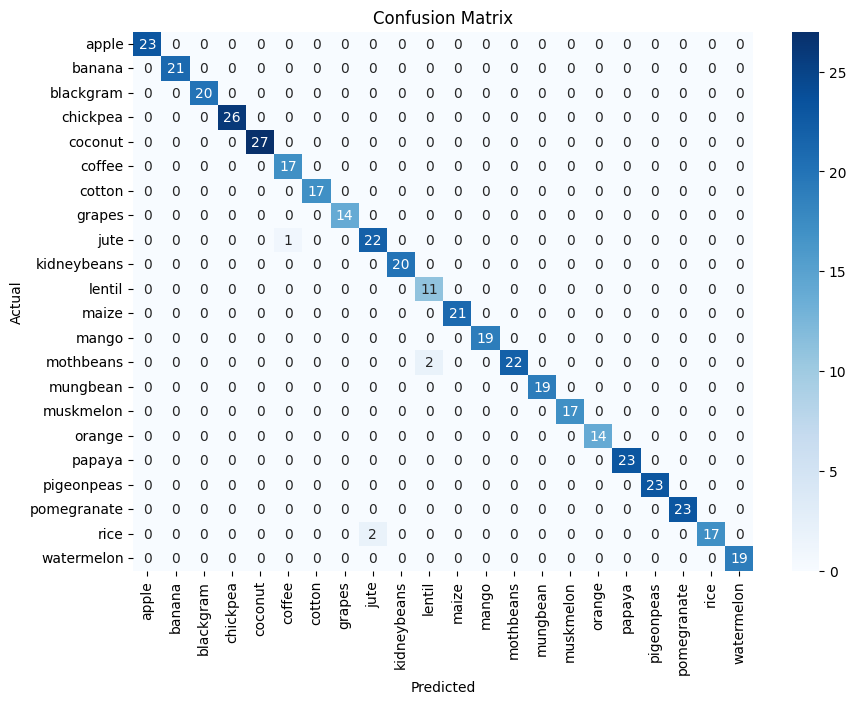

In [37]:
#compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
#save the model
import pickle

with open('crop_recommendation_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [39]:
# Load the model to verify it works
with open('crop_recommendation_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Verify the loaded model
X_test = df_val[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y_test = df_val['label']
loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded model accuracy: {loaded_accuracy * 100:.2f}%")

Loaded model accuracy: 98.86%
